In [62]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [64]:
X = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

y = np.array([
    0,
    1,
    1,
    0
])

In [70]:
model = Sequential()
model.add(Dense(2, input_dim = X.shape[1], activation='relu'))
model.add(Dense(1))

In [71]:
model.get_weights()

[array([[-0.94501376, -0.6721289 ],
        [ 0.19388926,  0.9241494 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.77057385],
        [-0.38960576]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X,y,verbose=2, epochs = 1)

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [3]:
def sigmoid_derivate(x):
    return x*(1-x)

In [4]:
training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])
training_outputs = np.array([[0,1,1,0]]).T

In [5]:
np.random.seed(1)

In [6]:
synaptic_weights = 2* np.random.random((3,1)) - 1

In [7]:
print("random starting synaptic weights")
print(synaptic_weights)

random starting synaptic weights
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [8]:
for iteration in range(20000):
    input_layer = training_inputs
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))
    error = training_outputs - outputs
    adjustments = error * sigmoid_derivate(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

    
print("synaptic weights after training")
print(synaptic_weights)
    
print("Original training outputs")
print(training_outputs)
print("outputs after training")
print(outputs)

synaptic weights after training
[[10.38040701]
 [-0.20641179]
 [-4.98452047]]
Original training outputs
[[0]
 [1]
 [1]
 [0]]
outputs after training
[[0.00679672]
 [0.99445583]
 [0.99548516]
 [0.00553614]]


In [9]:
class MLP:
    def __init__(self, num_inputs=2, num_hidden=[3,4], num_outputs = 2):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        
        layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]
         
        weights = [] 
        for i in range(len(layers)-1):
            w = np.random.rand(layers[i], layers[i+1])
            weights.append(w)
        self.weights = weights
        
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations
        
        derivatives = [] 
        for i in range(len(layers)-1):
            d = np.random.rand(layers[i], layers[i+1])
            derivatives.append(w)
        self.derivatives = derivatives
            
    def forward_propagate(self, inputs):
        activations = inputs  
        
        self.activations[0] = inputs
        
        for i, w in enumerate(self.weights):
            net_inputs = np.dot(activations, w) 
             
            activations = self.sigmoid(net_inputs)
            
            self.activations[i+1] = activations
            
        return activations
    
    def back_propagate(self, error):
        for i in reverse(range(len(self.derivatives))):
            print(i)
        
    def sigmoid(self, x):
        return 1/(1+ np.exp(-x))
    
    
    

In [10]:
np.random.seed(1)

mlp = MLP() 
inputs = np.random.rand(mlp.num_inputs)
outputs = mlp.forward_propagate(inputs)
print(outputs)


[0.81755214 0.87051793]


In [11]:
import numpy as np
import pandas as pd

In [12]:
#dataset import
dataset = pd.read_csv("data/train.csv") #You need to change #directory accordingly
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [16]:
from sklearn.preprocessing import StandardScaler

#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [18]:
#One hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [19]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [47]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [48]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation ='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [50]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
1800/1800 [==============================] - 0s 78us/step - loss: 1.4857 - accuracy: 0.2661
Epoch 2/100
1800/1800 [==============================] - 0s 22us/step - loss: 1.4021 - accuracy: 0.2967
Epoch 3/100
1800/1800 [==============================] - 0s 23us/step - loss: 1.3571 - accuracy: 0.3356
Epoch 4/100
1800/1800 [==============================] - 0s 29us/step - loss: 1.3138 - accuracy: 0.3750
Epoch 5/100
1800/1800 [==============================] - 0s 27us/step - loss: 1.2665 - accuracy: 0.4233
Epoch 6/100
1800/1800 [==============================] - 0s 24us/step - loss: 1.2116 - accuracy: 0.4772
Epoch 7/100
1800/1800 [==============================] - 0s 21us/step - loss: 1.1481 - accuracy: 0.5150
Epoch 8/100
1800/1800 [==============================] - 0s 25us/step - loss: 1.0712 - accuracy: 0.5556
Epoch 9/100
1800/1800 [==============================] - 0s 26us/step - loss: 0.9878 - accuracy: 0.6033
Epoch 10/100
1800/1800 [==============================] - 0s 22u

1800/1800 [==============================] - 0s 22us/step - loss: 0.0711 - accuracy: 0.9822
Epoch 80/100
1800/1800 [==============================] - 0s 22us/step - loss: 0.0698 - accuracy: 0.9839
Epoch 81/100
1800/1800 [==============================] - 0s 20us/step - loss: 0.0705 - accuracy: 0.9833
Epoch 82/100
1800/1800 [==============================] - 0s 22us/step - loss: 0.0694 - accuracy: 0.9822
Epoch 83/100
1800/1800 [==============================] - 0s 22us/step - loss: 0.0670 - accuracy: 0.9844
Epoch 84/100
1800/1800 [==============================] - 0s 23us/step - loss: 0.0647 - accuracy: 0.9856
Epoch 85/100
1800/1800 [==============================] - 0s 22us/step - loss: 0.0644 - accuracy: 0.9878
Epoch 86/100
1800/1800 [==============================] - 0s 23us/step - loss: 0.0648 - accuracy: 0.9844
Epoch 87/100
1800/1800 [==============================] - 0s 21us/step - loss: 0.0636 - accuracy: 0.9867
Epoch 88/100
1800/1800 [==============================] - 0s 23us/st

In [51]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [52]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 94.5


In [53]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 37us/step - loss: 0.0486 - accuracy: 0.9933 - val_loss: 0.1212 - val_accuracy: 0.9500
Epoch 2/100
1800/1800 [==============================] - 0s 30us/step - loss: 0.0481 - accuracy: 0.9939 - val_loss: 0.1214 - val_accuracy: 0.9450
Epoch 3/100
1800/1800 [==============================] - 0s 27us/step - loss: 0.0476 - accuracy: 0.9933 - val_loss: 0.1247 - val_accuracy: 0.9500
Epoch 4/100
1800/1800 [==============================] - 0s 28us/step - loss: 0.0487 - accuracy: 0.9917 - val_loss: 0.1171 - val_accuracy: 0.9500
Epoch 5/100
1800/1800 [==============================] - 0s 26us/step - loss: 0.0461 - accuracy: 0.9939 - val_loss: 0.1166 - val_accuracy: 0.9500
Epoch 6/100
1800/1800 [==============================] - 0s 27us/step - loss: 0.0447 - accuracy: 0.9950 - val_loss: 0.1181 - val_accuracy: 0.9500
Epoch 7/100
1800/1800 [==============================] - 0s 27us/step - loss:

In [54]:
import matplotlib.pyplot as plt

In [55]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

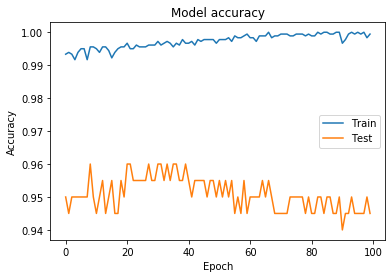

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

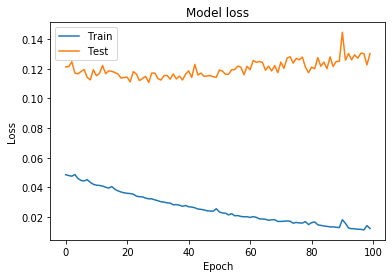

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'])
plt.show()